In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [4]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], format='%Y-%m-%d')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')

# 1. Inspect datasets

In [13]:
print("Customers Data Overview:")
print(customers_df.info())
print(customers_df.head())

Customers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15


In [14]:
print("\nProducts Data Overview:")
print(products_df.info())
print(products_df.head())


Products Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [15]:
print("\nTransactions Data Overview:")
print(transactions_df.info())
print(transactions_df.head())


Transactions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C

# 2. Exploratory Data Analysis

In [16]:
sns.set_theme(style="whitegrid")

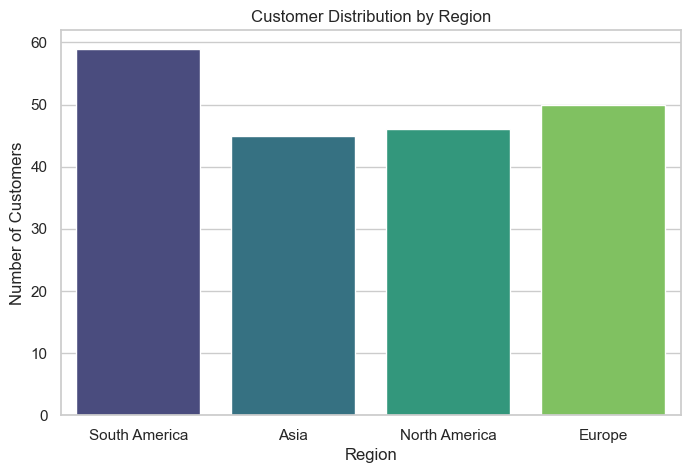

In [17]:
# Customer distribution by region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

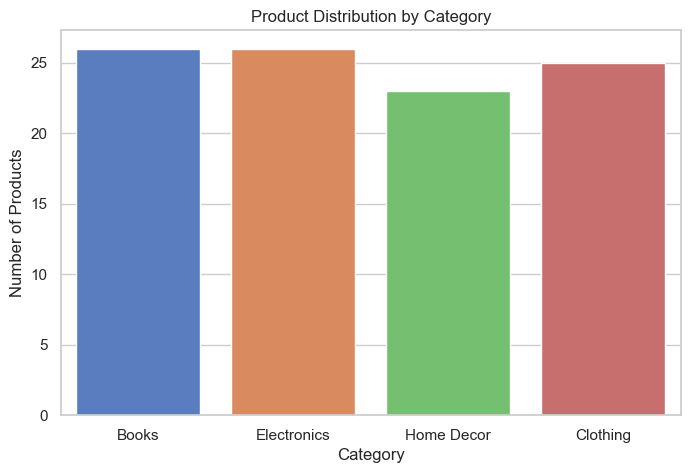

In [19]:
# Product categories distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=products_df, x='Category', palette='muted')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

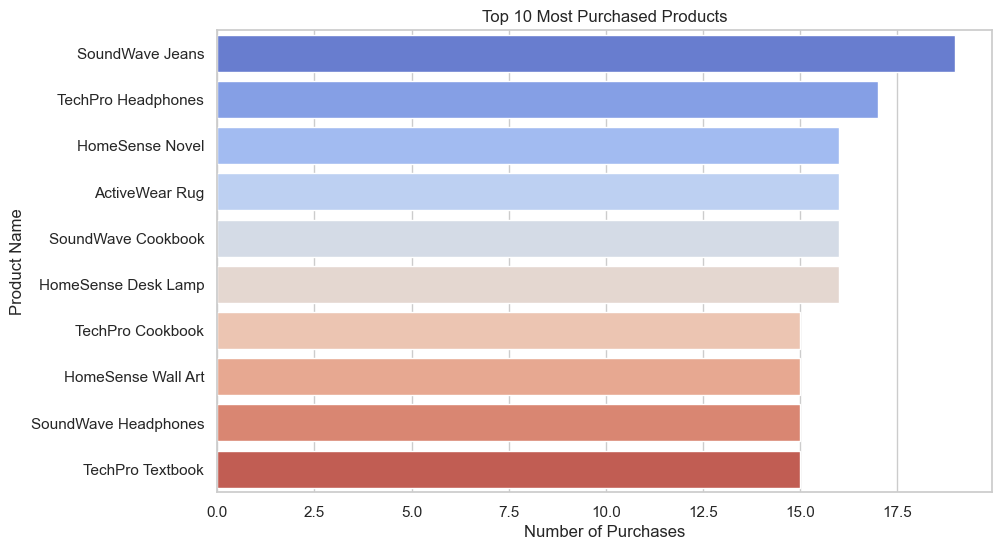

In [22]:
# Top 10 most purchased products
top_products = transactions_df['ProductID'].value_counts().head(10)
top_product_names = products_df.set_index('ProductID').loc[top_products.index, 'ProductName']

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_product_names, palette='coolwarm')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Name')
plt.show()

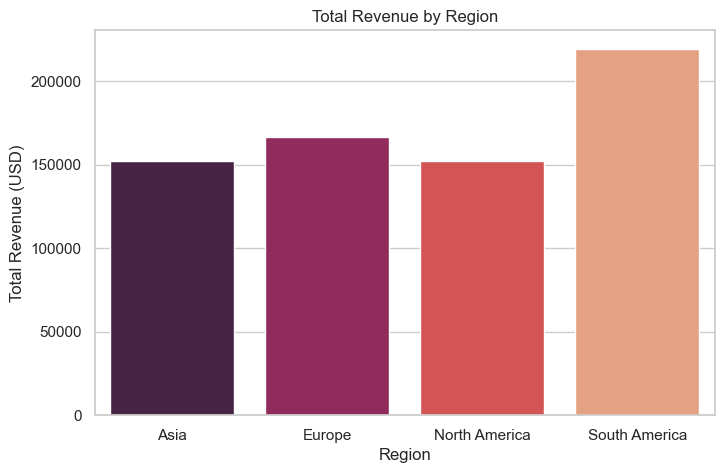

In [23]:
# Total revenue by region
transactions_with_customers = transactions_df.merge(customers_df, on='CustomerID')
region_revenue = transactions_with_customers.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='rocket')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()

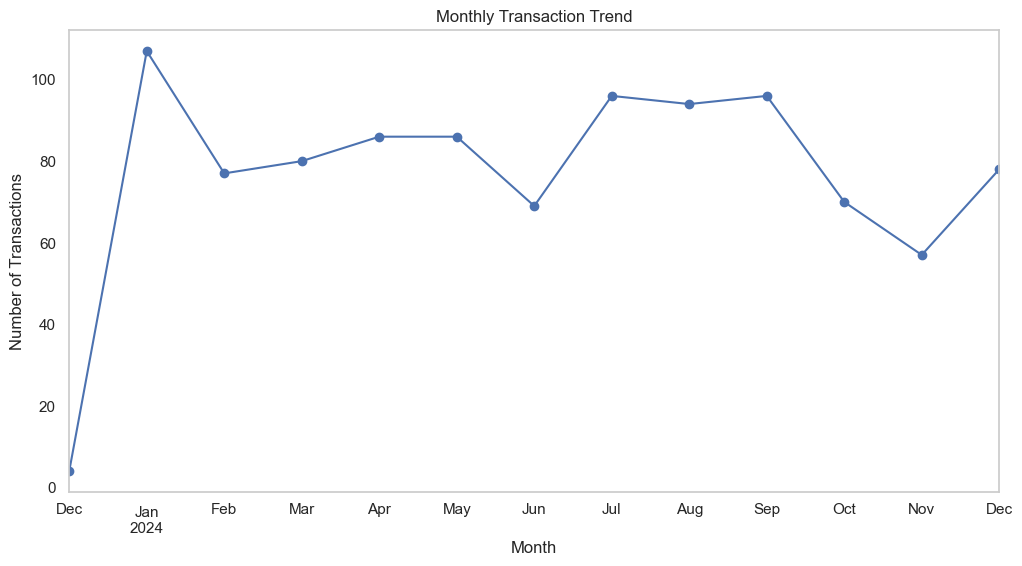

In [24]:
# Monthly transaction trend
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df.groupby('Month')['TransactionID'].count()

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='b')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

# 3. Summary of Insights

In [26]:
print("\nBusiness Insights:")
print("1. South America has the largest customer base and generates the highest revenue. Targeted promotions in this region could boost sales further.")
print("2. Books and Electronics dominate product categories, suggesting opportunities to expand in these areas.")
print("3. A small subset of products contributes to most transactions, emphasizing the need to prioritize inventory for these products.")
print("4. Seasonal trends reveal peaks in transaction volumes, indicating potential periods for promotional campaigns.")
print("5. Revenue differences across regions hint at opportunities for localized marketing strategies.")


Business Insights:
1. South America has the largest customer base and generates the highest revenue. Targeted promotions in this region could boost sales further.
2. Books and Electronics dominate product categories, suggesting opportunities to expand in these areas.
3. A small subset of products contributes to most transactions, emphasizing the need to prioritize inventory for these products.
4. Seasonal trends reveal peaks in transaction volumes, indicating potential periods for promotional campaigns.
5. Revenue differences across regions hint at opportunities for localized marketing strategies.
